In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "im3"
vol = "vlim"
z_range = "low_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [4]:
print(len(clusters))
print(len(shapes))

0
0


In [5]:
# Print the numbers of galaxies that needed to be masked


print(np.sum(shapes[('All','e1')]==-9999))
print(np.sum(shapes[('All','e2')]==-9999))
print(np.sum(shapes['All','flags_select']==0))
print(np.sum(shapes[('All','PP')]<=0.55))

0
0
0
0


In [6]:
#masking
print(len(clusters))
print(len(shapes))

0
0


# Stats of e1,e2

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: (All, e2), dtype: float64

/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/matplotlib/colors.py:1113: RuntimeWarning: divide by zero encountered in log
  resdat -= np.log(vmin)
/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/matplotlib/colors.py:1114: RuntimeWarning: divide by zero encountered in log
  resdat /= (np.log(vmax) - np.log(vmin))


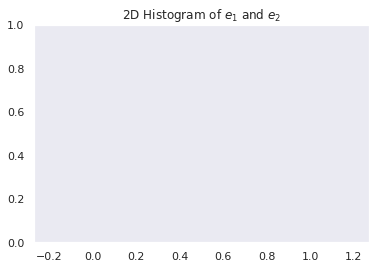

In [7]:
from matplotlib.colors import LogNorm 
plt.hist2d(shapes['All','e1'],shapes['All','e2'],bins=500,norm=LogNorm())
plt.axis('equal')
plt.title("2D Histogram of $e_1$ and $e_2$")
pd.Series(shapes['All','e1']).describe()
pd.Series(shapes['All','e2']).describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64

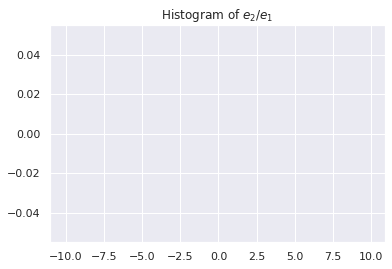

In [8]:
#statistics and hisgoram of e2/e1
plt.hist(shapes['All','e2']/shapes['All','e1'],bins=np.arange(-10,10,0.1))
plt.title("Histogram of $e_2$/$e_1$")
pd.Series(shapes['All','e2']/shapes['All','e1']).describe()

# Get phi 

In [9]:
def get_std_err_of_mean(np_array):
    mean=np_array.mean()
    std=np_array.std()
    n=len(np_array)
    return(std/np.sqrt(n))

In [10]:
phi_1d=shapes[('All','phi')]

## Stats for unweighted

In [11]:
pd.Series(phi_1d).describe()
print("Mean:{:05e} \nStdE:{:05e} ".format(phi_1d.mean(),phi_1d.std()/np.sqrt(len(phi_1d))))

Mean:00nan 
StdE:00nan 


/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: (All, phi), dtype: float64

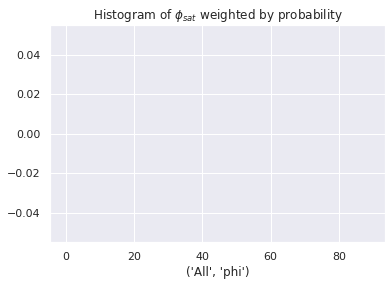

In [12]:
BINS=np.arange(0,90,1)
ax = sns.distplot(shapes[('All','phi')],bins=BINS,kde=False)
ax.set_title("Histogram of $\phi_{sat}$ weighted by probability") 
pd.Series(phi_1d).describe()

# Abnormal Analysis

In [13]:
np.sum((shapes[('All','phi')]>=22.4) &(shapes[('All','phi')]<=22.6)) 
abn_1 = shapes[(shapes[('All','phi')]>=22.4) &(shapes[('All','phi')]<=22.6)]
abn_2 = shapes[(shapes[('All','phi')]>67.4) &(shapes[('All','phi')]<=67.6)]

In [14]:
corr_1=abn_1.corr(method='pearson')[('All','phi')]
corr_2=abn_2.corr(method='pearson')[('All','phi')]

In [15]:
display(HTML((pd.concat([pd.DataFrame(corr_1),pd.DataFrame(corr_2)],axis=1)).to_html()))
# display(corr_2.to_html())

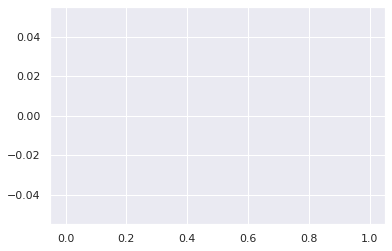

In [16]:
abn_1[('All','RA')].hist()
#RA of objects with ϕ=22.5

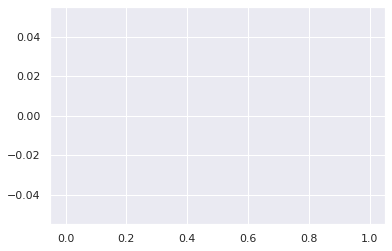

In [17]:
abn_2[('All','RA')].hist()
#RA of objects with ϕ=67.5

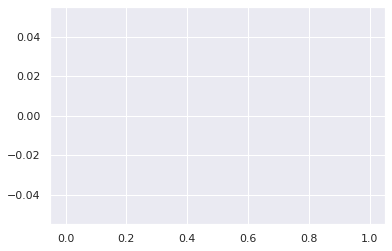

In [18]:
shapes[('All','RA')].hist()
#RA of all objects

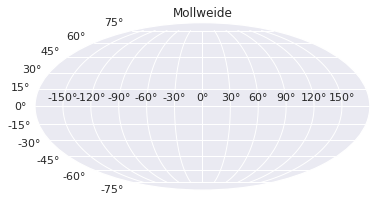

In [19]:
abn_1_Coor=SkyCoord(abn_1['All','RA'],abn_1['All','DEC'],unit=u.deg)
abn_2_Coor=SkyCoord(abn_2['All','RA'],abn_2['All','DEC'],unit=u.deg)
shape_Coor=SkyCoord(shapes['All','RA'],shapes['All','DEC'],unit=u.deg)


plt.figure()
plt.subplot(111, projection="mollweide")
plt.title("Mollweide")
plt.grid(True)
plt.scatter(shape_Coor.ra.radian, shape_Coor.dec.radian,color='y')
plt.scatter(abn_1_Coor.ra.radian, abn_1_Coor.dec.radian,color='r')
plt.scatter(abn_2_Coor.ra.radian, abn_2_Coor.dec.radian,color='m')
plt.show()

In [20]:
# np.save("/home/cz136/project/sa/data/im3_225_id.npy",abn_1.index.to_numpy())
# np.save("/home/cz136/project/sa/data/im3_675_id.npy",abn_2.index.to_numpy())
# np.save("/home/cz136/project/sa/data/im3_225_ra.npy",abn_1[('All','ra')].to_numpy())
# np.save("/home/cz136/project/sa/data/im3_225_dec.npy",abn_1[('All','dec')].to_numpy())
# np.save("/home/cz136/project/sa/data/im3_675_ra.npy",abn_2[('All','ra')].to_numpy())
# np.save("/home/cz136/project/sa/data/im3_675_dec.npy",abn_2[('All','dec')].to_numpy())

# Analysis around 22.5 and 67.5

In [21]:
#Print out the most crowded bins

phi_count=np.histogram(phi_1d,bins=BINS)
sort=np.argsort(-phi_count[0])
print(phi_count[1][sort])
print(phi_count[0][sort])

[ 0 63 62 61 60 59 58 57 56 64 55 53 52 51 50 49 48 47 46 54 65 66 67 86
 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71 70 69 68 45 87 44 42 18 17
 16 15 14 13 12 11 19 10  8  7  6  5  4  3  2  1  9 20 21 22 41 40 39 38
 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 43 88]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: (All, phi), dtype: float64

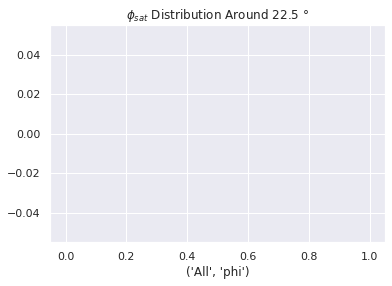

In [22]:
#Statistics around 22.5
first_cluster_left=np.sum(phi_count[0][0:22])
first_length=phi_count[0][sort][0]
first_cluster=phi_1d[first_cluster_left:first_cluster_left+first_length]
ax = sns.distplot(first_cluster,kde=False)
ax.set_title("$\phi_{sat}$ Distribution Around 22.5 $\degree$")
pd.Series(first_cluster).describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: (All, phi), dtype: float64

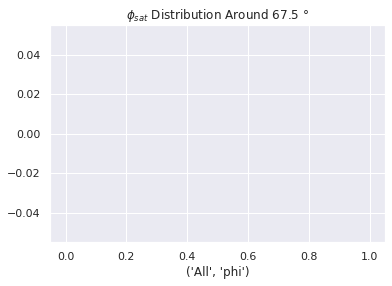

In [23]:
second_cluster_left=np.sum(phi_count[0][0:67])
second_length=phi_count[0][sort][0]
second_cluster=phi_1d[second_cluster_left:second_cluster_left+second_length]
ax = sns.distplot(second_cluster,kde=False)
ax.set_title("$\phi_{sat}$ Distribution Around 67.5 $\degree$")
pd.Series(second_cluster).describe()

# Get e

## Statistics of e1 and e2

In [24]:
e1=shapes[('All','e1')].to_numpy()
shapes[('All','e1')].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: (All, e1), dtype: float64

In [25]:
e2=shapes[('All','e1')].to_numpy()
shapes[('All','e2')].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: (All, e2), dtype: float64

In [26]:
# np.save("/home/cz136/project/sa/data/{}/e_array".format(dir_string),e_list)

In [27]:
e_p_1d=shapes[('All','ep')]
e_x_1d=shapes[('All','ex')]

mean=00nan, std_mean=00nan


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: (All, ep), dtype: float64

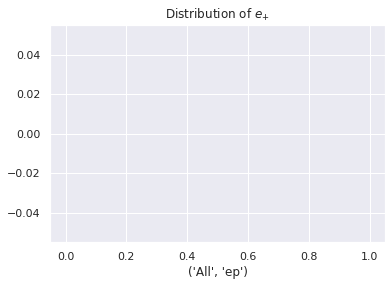

In [28]:
ax=sns.distplot(e_p_1d,kde=False)
ax.set_title("Distribution of $e_{+}$")
print ("mean={:05e}, std_mean={:05e}".format(e_p_1d.mean(),get_std_err_of_mean(e_p_1d)))
pd.Series(e_p_1d).describe()

mean=00nan, std_mean=00nan


/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: (All, ex), dtype: float64

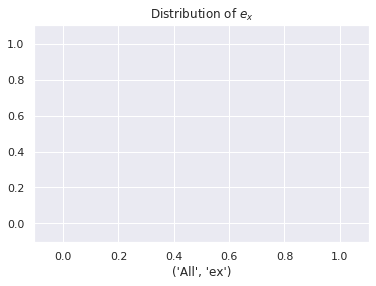

In [29]:
ax=sns.distplot(e_x_1d)
ax.set_title("Distribution of $e_{x}$")
print ("mean={:05e}, std_mean={:05e}".format(e_x_1d.mean(),get_std_err_of_mean(e_x_1d)))
pd.Series(e_x_1d).describe()